# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
len(complete_data["Mouse ID"].unique())

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
len(duplicate)

5

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate
show_duplicates = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = complete_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
print(len(cleandata))
print(len(cleandata["Mouse ID"].unique()))

1888
249


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg = cleandata.groupby(["Drug Regimen"])
tumormean = drug_reg["Tumor Volume (mm3)"].mean()
tumormedian = drug_reg["Tumor Volume (mm3)"].median()
tumorvariance = drug_reg["Tumor Volume (mm3)"].var()
tumorstd = drug_reg["Tumor Volume (mm3)"].std()
tumorsem = drug_reg["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({"Mean Tumor Volume": tumormean,
                              "Median Tumor Volume" : tumormedian,
                              "Tumor Volume Variance": tumorvariance,
                              "Tumor Volume Std. Dev" : tumorstd,
                              "Tumor Volume Std. Err." : tumorsem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_summary_single = drug_reg["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_single

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

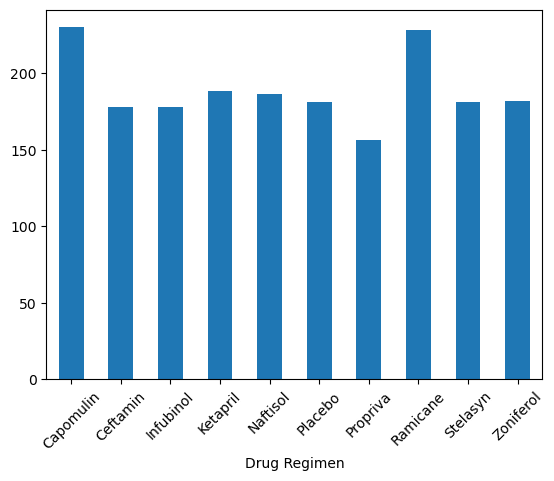

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
MouseTimepoints = cleandata.groupby(["Drug Regimen"]).count()["Mouse ID"]
barpandas = MouseTimepoints.plot.bar(x="Drug Regimen", y="Mouse ID", rot=45)
barpandas

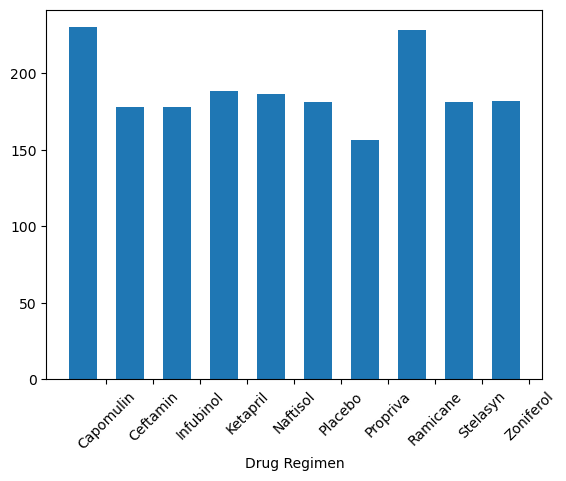

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = np.arange(len(MouseTimepoints))
yaxis = MouseTimepoints
plt.bar(xaxis,yaxis, width=0.6,align="center")
ticks = [value+0.5 for value in xaxis]
plt.xticks(ticks, MouseTimepoints.index.values, rotation=45)
plt.xlabel("Drug Regimen")
plt.show()

<Axes: ylabel='Mouse ID'>

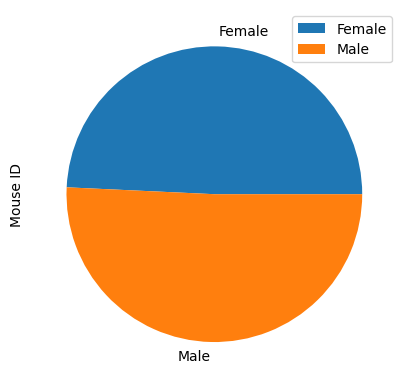

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
MouseGender = cleandata.groupby(["Sex"]).count()
MouseGender
piepandas = MouseGender.plot.pie(y="Mouse ID")
piepandas

([<matplotlib.patches.Wedge at 0x2800bacb340>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')],
 [Text(0.01397618073072243, 0.5998371998902553, '49.3%'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.7%')])

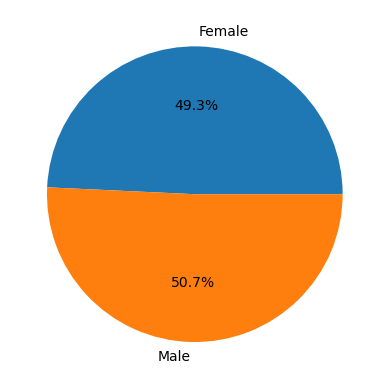

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MouseGender
labels = ["Female", "Male"]

plt.pie(MouseGender["Mouse ID"], labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
FinalVolume = cleandata.groupby(["Mouse ID"])["Timepoint"].max()
FinalVolume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
FinalVolumeMerged = pd.merge(FinalVolume, cleandata, on=(["Mouse ID", "Timepoint"]))
FinalVolumeMerged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvolume = FinalVolumeMerged.loc[FinalVolumeMerged["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#print results
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


([<matplotlib.axis.XTick at 0x2800bafebf0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

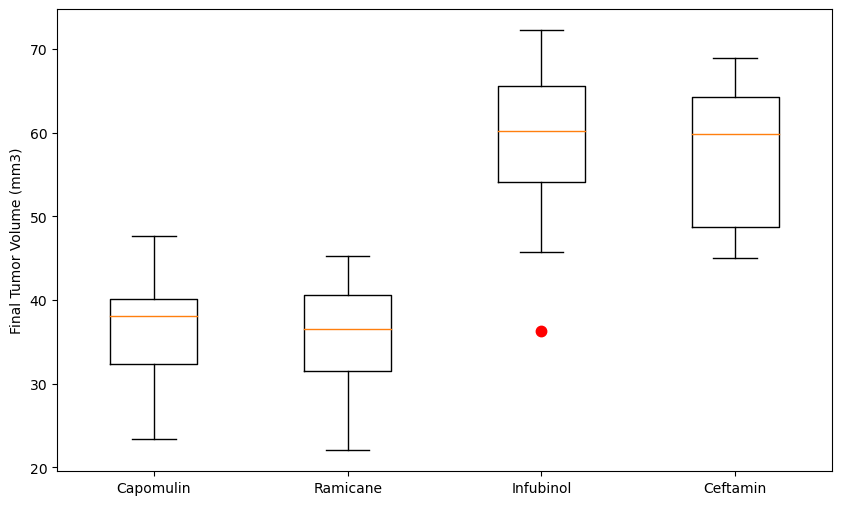

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots(figsize=(10,6))
#custom marker
flierprops = dict(marker='.', markerfacecolor='r', markersize=15,
                  linestyle='none', markeredgecolor='r')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
#set label
ax1.set_ylabel('Final Tumor Volume (mm3)')
#label ticks
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

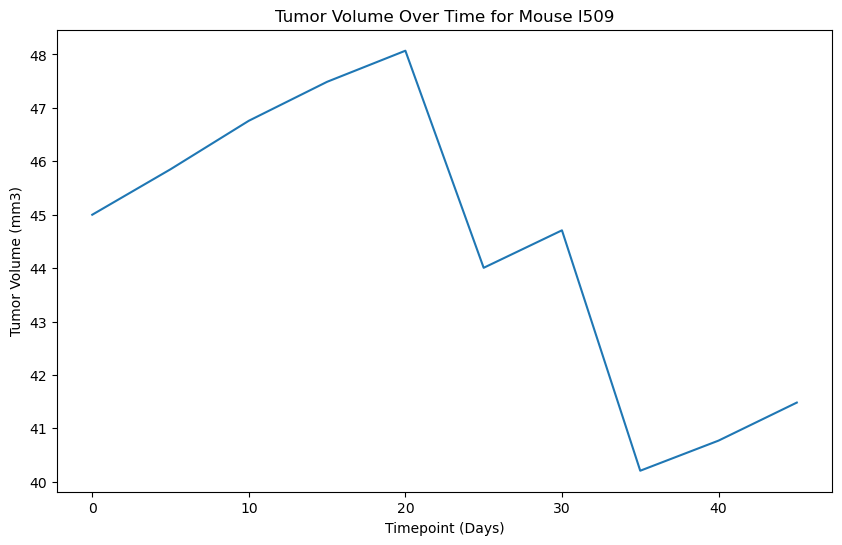

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_treatment = cleandata.loc[cleandata["Drug Regimen"] == "Capomulin"]
cap_treatment.value_counts("Mouse ID")

#choose mouse i509 and isolate her data
l509= cleandata.loc[cleandata["Mouse ID"] == "l509"]
l509

fig1,ax1 = plt.subplots(figsize=(10,6))
#make x & y axes
cap_xaxis = l509["Timepoint"]
cap_yaxis = l509["Tumor Volume (mm3)"]
plt.plot(cap_xaxis, cap_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse l509")
plt.show()

C:\Users\Güero\AppData\Local\Temp\ipykernel_10092\2956262637.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap_weight = cap_treatment.groupby(["Mouse ID"]).mean()


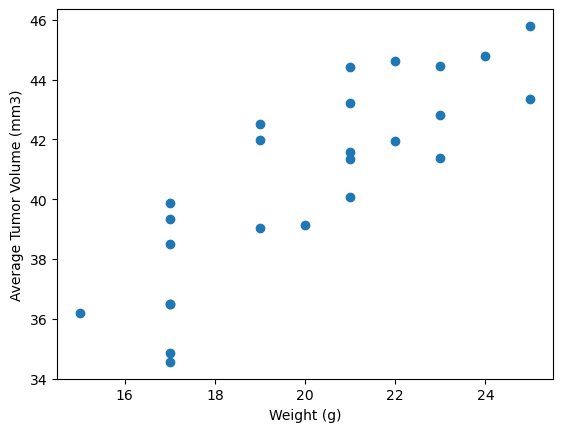

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_cap_weight = cap_treatment.groupby(["Mouse ID"]).mean()
plt.scatter(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694719
y = 0.95x + 21.55


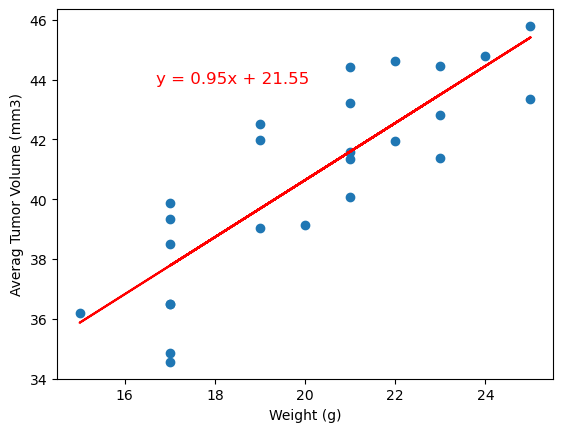

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corcoef = st.pearsonr(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {corcoef}")

#make scatter plot
plt.scatter(avg_cap_weight['Weight (g)'],avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

#variables for lin regression 
lin_x_values = avg_cap_weight['Weight (g)']
lin_y_values = avg_cap_weight['Tumor Volume (mm3)']

#develop equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lin_x_values, lin_y_values)
regress_values = lin_x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

#add equation & line onto plot
plt.annotate(equation, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=12,color="red")
plt.plot(lin_x_values,regress_values,"r-")
plt.show()